# Mountaineers Trip Report Analysis

this proccess a leader activity report from the mountaineers (produced by Sara Ramsey).  

The report had these columns

 * `plone ID`
 * `Contact: Branch`
 * `Last Name`
 * `First Name`
 * `Email`
 * `Activity Role`
 * `Mountaineers Activity: Activity Category`
 * `Mountaineers Activity: Start Date`
 * `Mountaineers Activity: Activity Name`
 * `Mountaineers Activity: Leader`
 * `Mountaineers Activity: Trip Results`

I did some manual processing to remove leaders who were not actually Seattle Branch


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path


In [2]:
#
# Set up paths to data directory and report output directory
#
dataDirectory = Path(Path.home(), "Documents/mountaineers/kayak-seattle/leaderactivity")
dataFileName = "Seattle SK Leaders 2018-20.csv"
reportDirectory = os.path.join(dataDirectory, "reports")
if not os.path.exists(reportDirectory):
    os.makedirs(reportDirectory)

In [3]:
ds = pd.read_csv(os.path.join(dataDirectory, dataFileName)
        , parse_dates=[ 'Start Date' ]
        )

# Make a full name field.  
ds["Full Name"] = ds["First Name"] + " " + ds["Last Name"]
# ds.info()

# Find earliest and lateset date.  Make a string describing that range
earliestDate = ds["Start Date"].min()
latestDate = ds["Start Date"].max()
labelDateRange = f"{earliestDate:%Y-%m-%d} to {latestDate:%Y-%m-%d}"

In [4]:
#
# Define function to plot a graph and save to file.
#
def plotActivity(dataSet, title):
    leaderCounts = dataSet.value_counts()
    maxCount = leaderCounts.max()
    xTicks = [ x for x in range(0,maxCount + 1)]

    ysize = int(len(leaderCounts) / 2) + 2
    leaderCounts.plot.barh(figsize=(25,ysize), title=title, xticks=xTicks, color=(0.3, 0.8, 0.5, 1.0))
    fileName = os.path.join(reportDirectory, f"{title}.jpg")
    print (f"Saving '{fileName}', size {ysize}")
    plt.savefig(fileName)
    plt.show()

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/All + All on 2018-01-21 to 2020-12-19.jpg', size 26


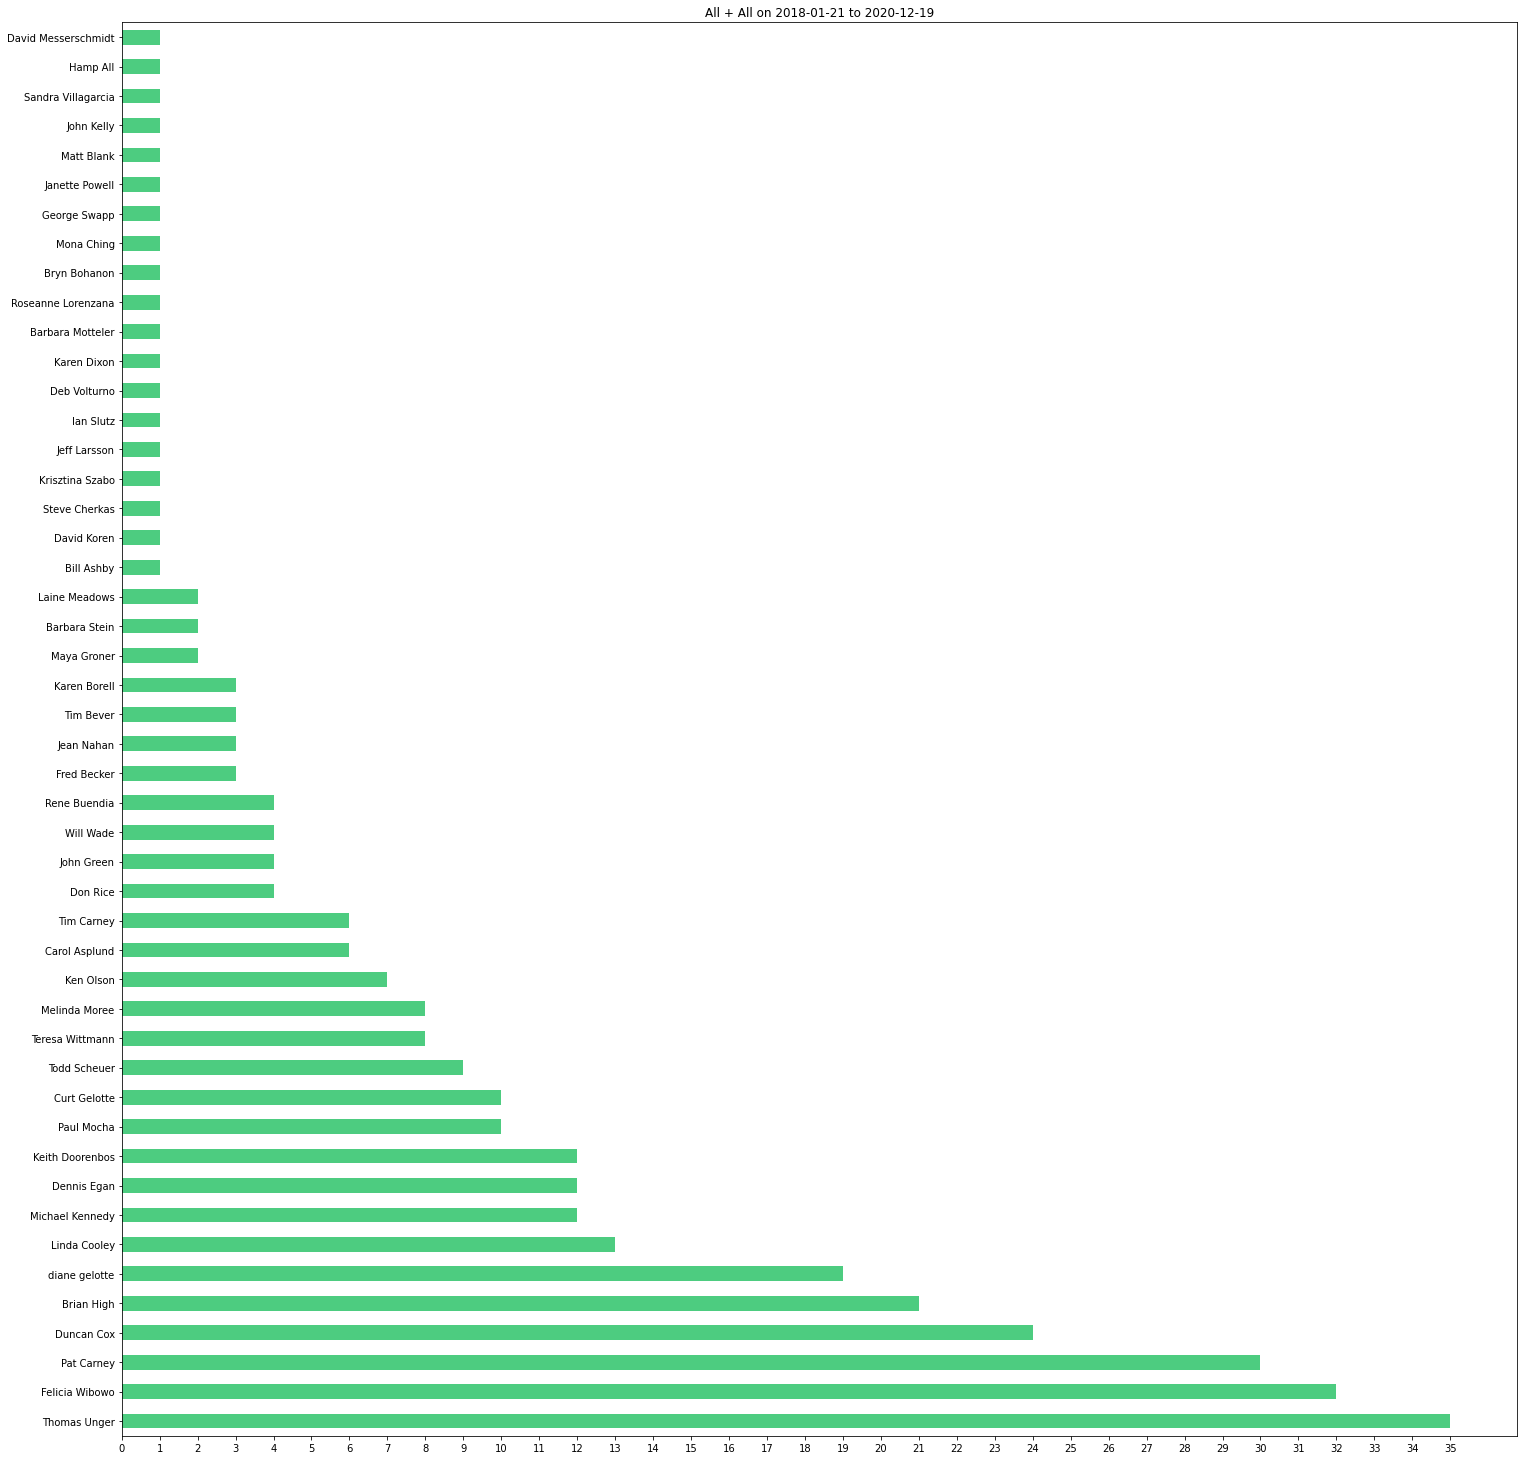

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/All + Trip on 2018-01-21 to 2020-12-19.jpg', size 16


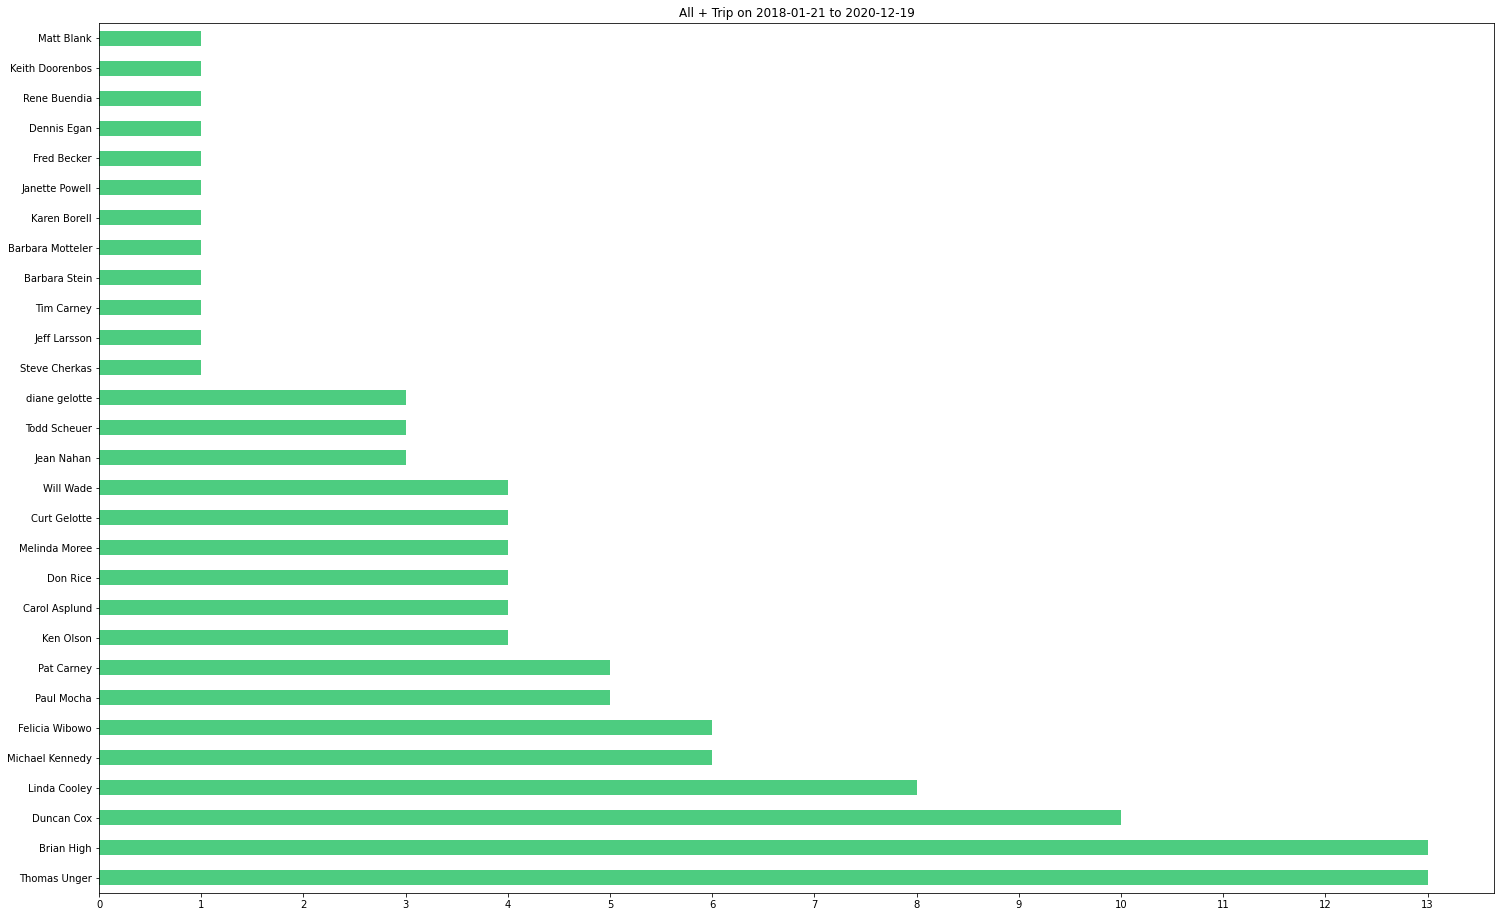

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/All + Field Trip on 2018-01-21 to 2020-12-19.jpg', size 19


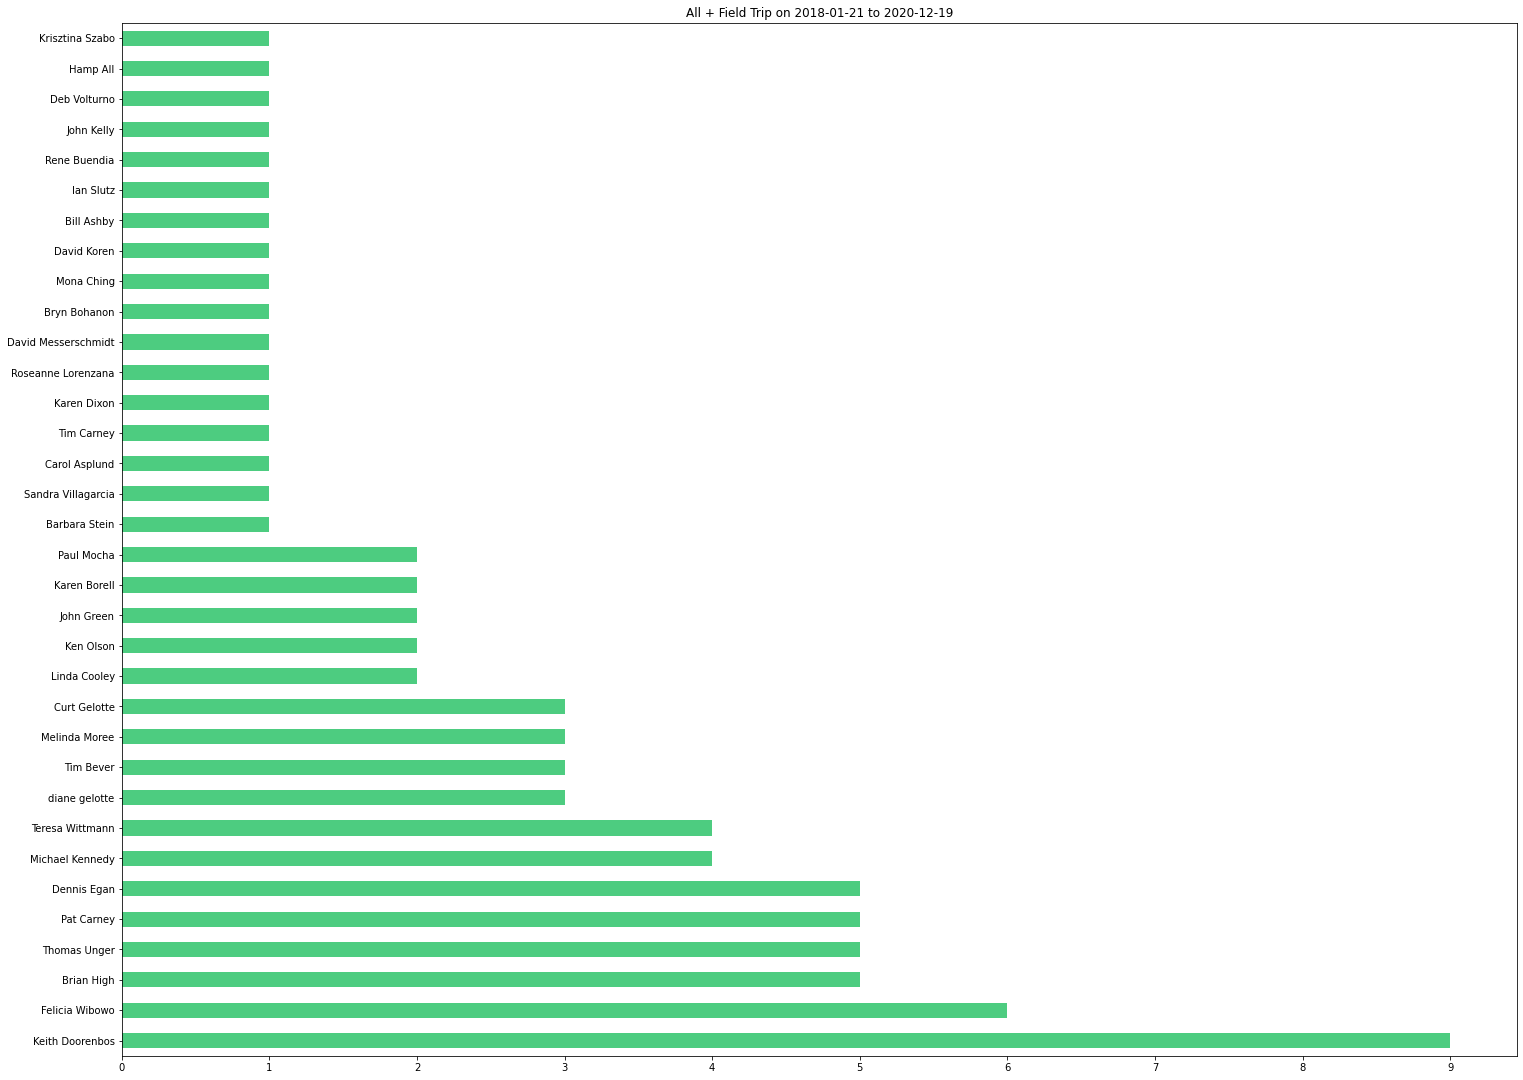

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/All + Clinic on 2018-01-21 to 2020-12-19.jpg', size 12


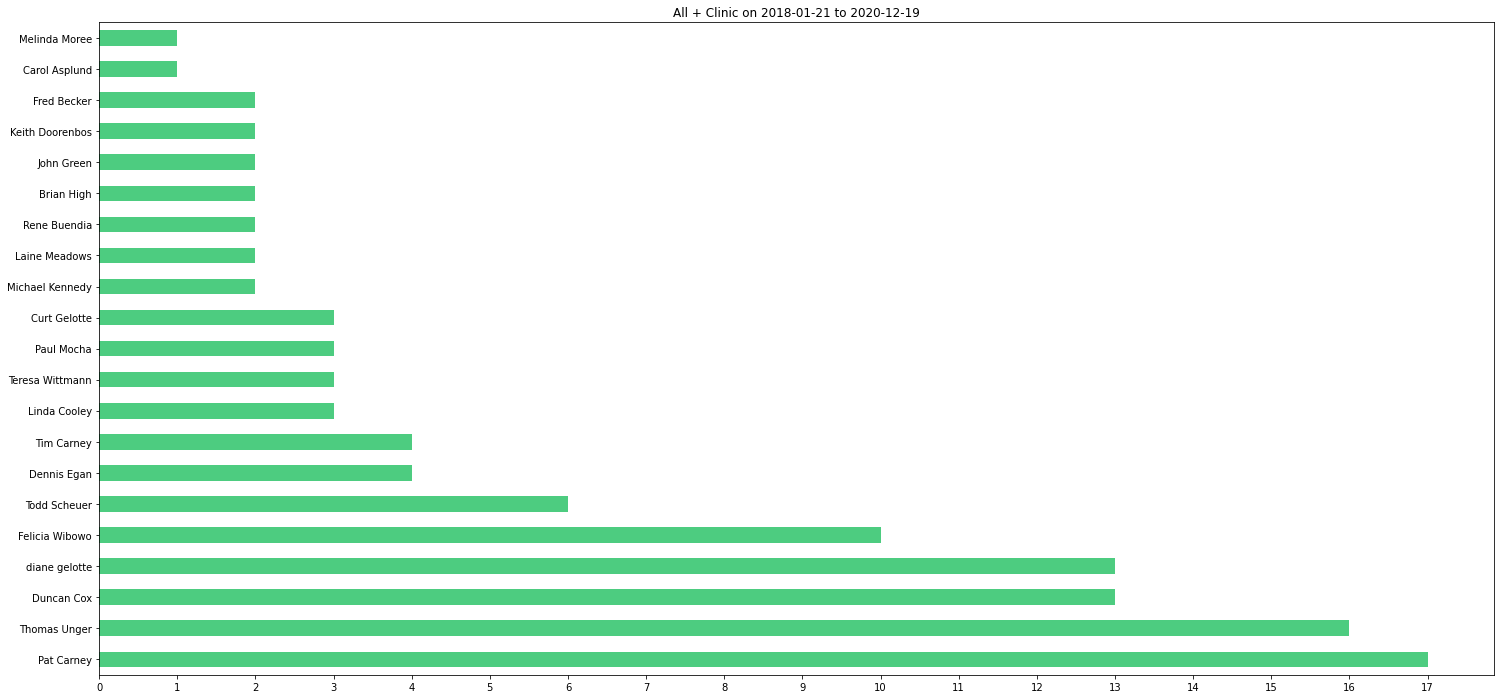

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/All + Seminar on 2018-01-21 to 2020-12-19.jpg', size 5


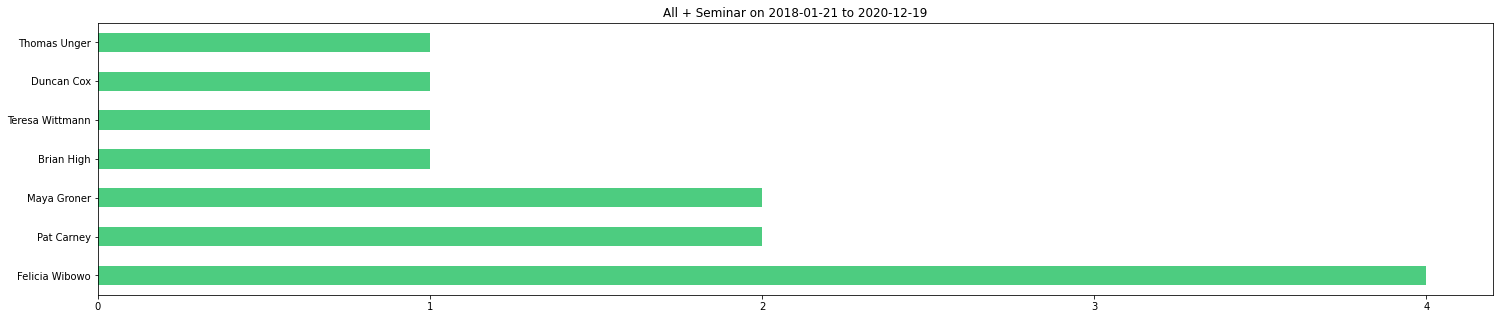

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/All + Lecture on 2018-01-21 to 2020-12-19.jpg', size 4


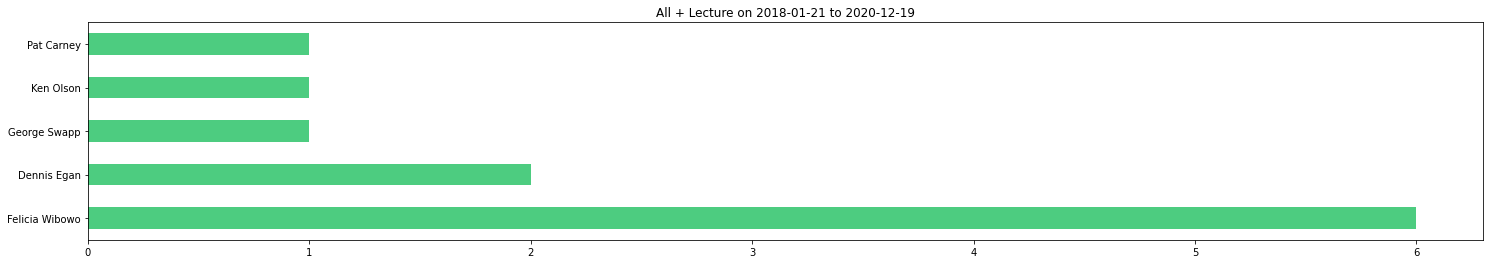

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/Primary leader + All on 2018-01-21 to 2020-12-19.jpg', size 13


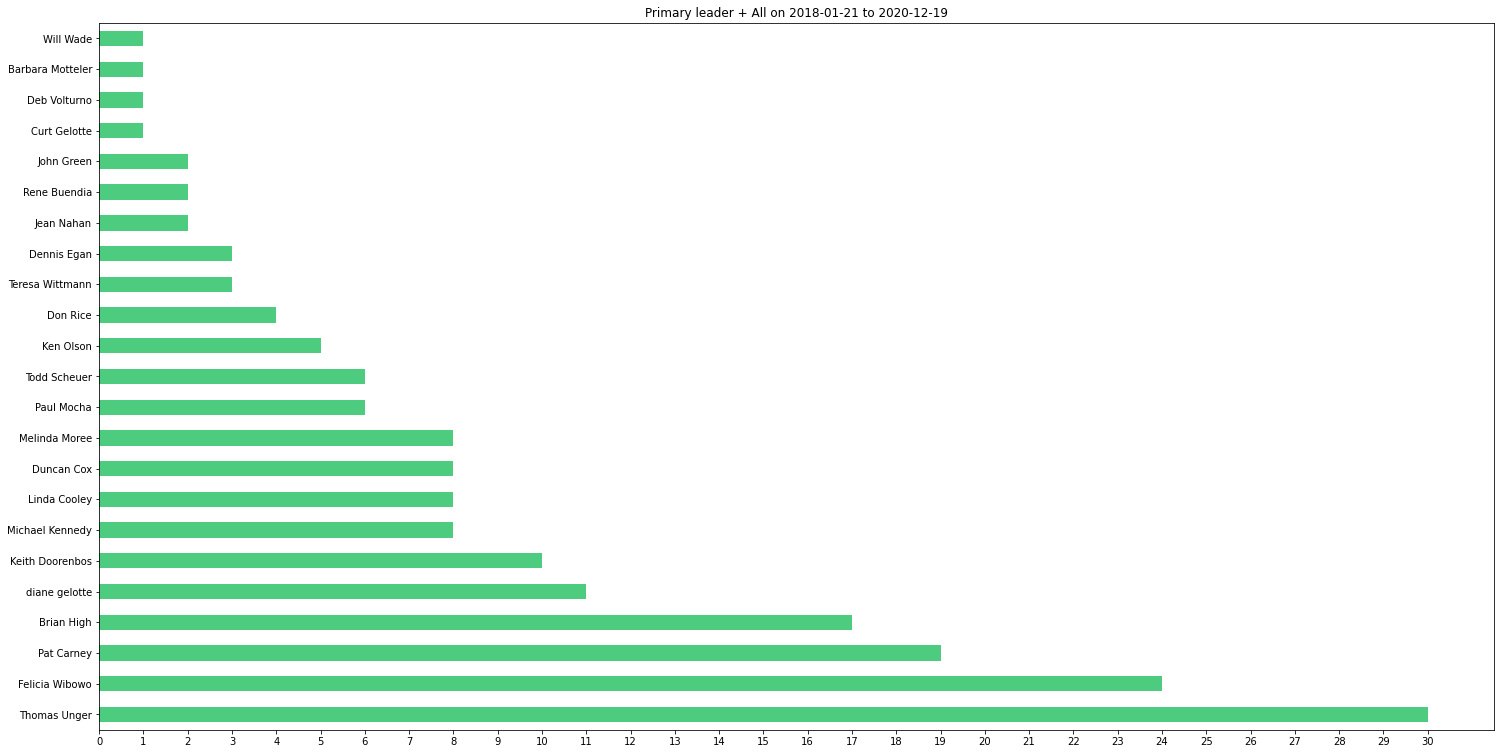

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/Primary leader + Trip on 2018-01-21 to 2020-12-19.jpg', size 11


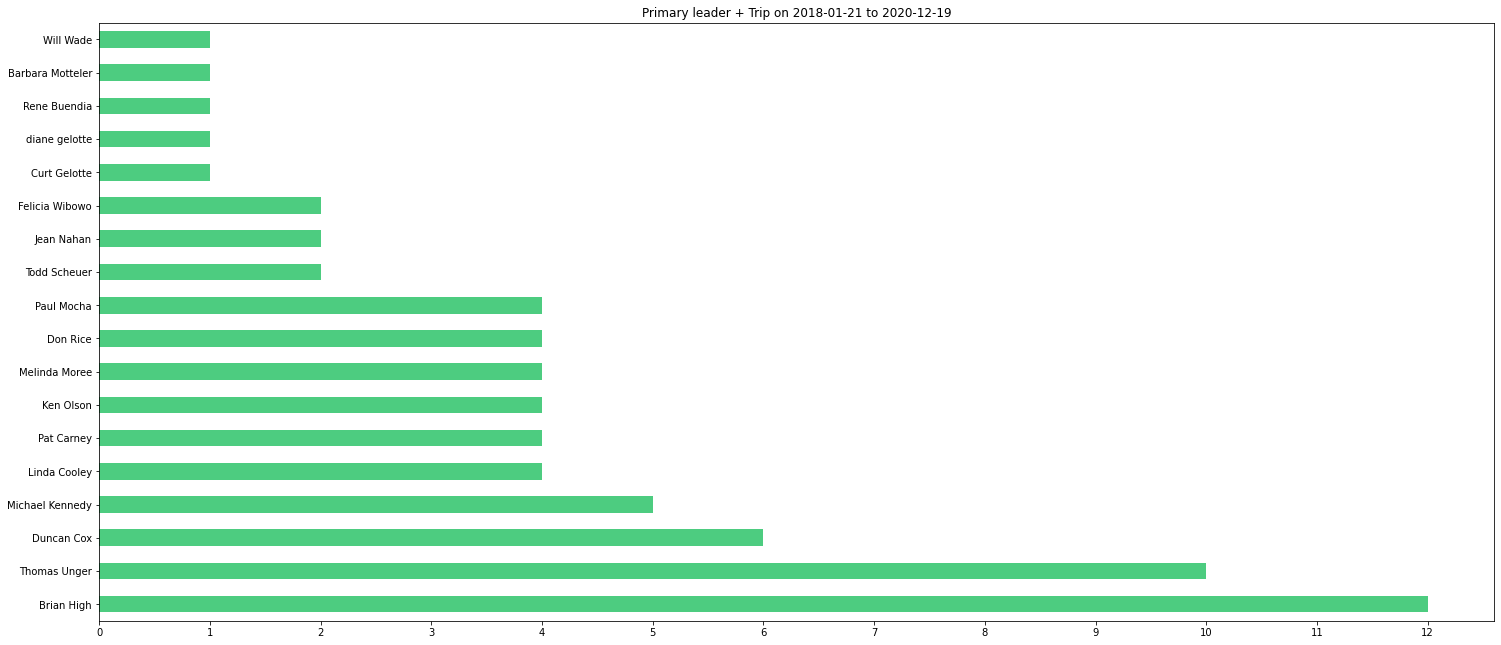

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/Primary leader + Field Trip on 2018-01-21 to 2020-12-19.jpg', size 8


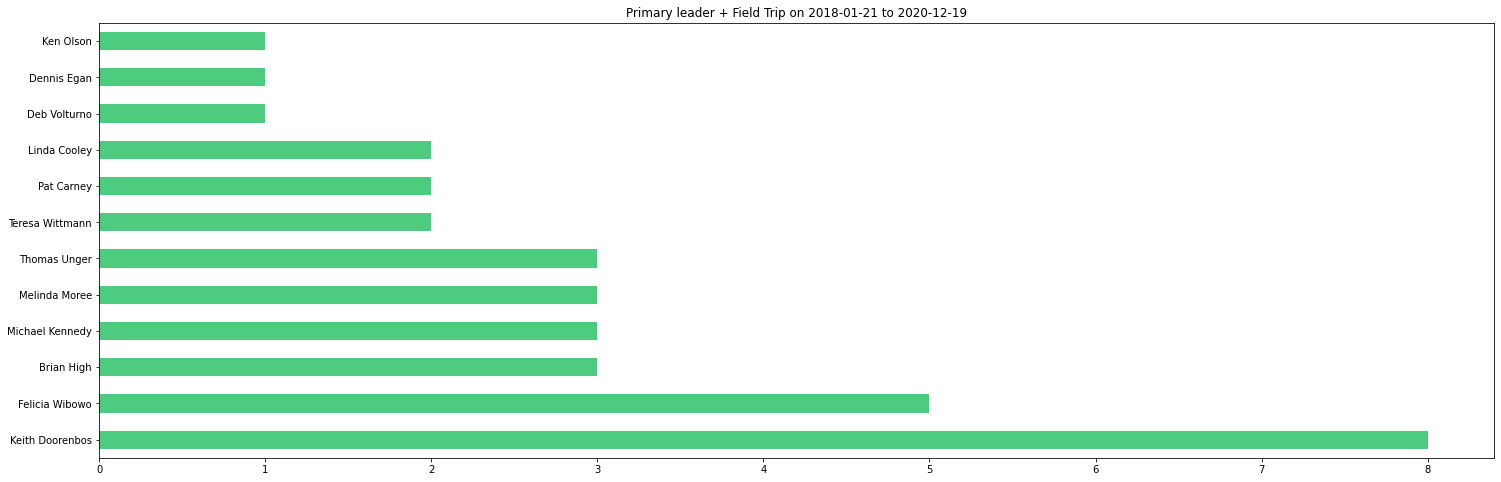

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/Primary leader + Clinic on 2018-01-21 to 2020-12-19.jpg', size 8


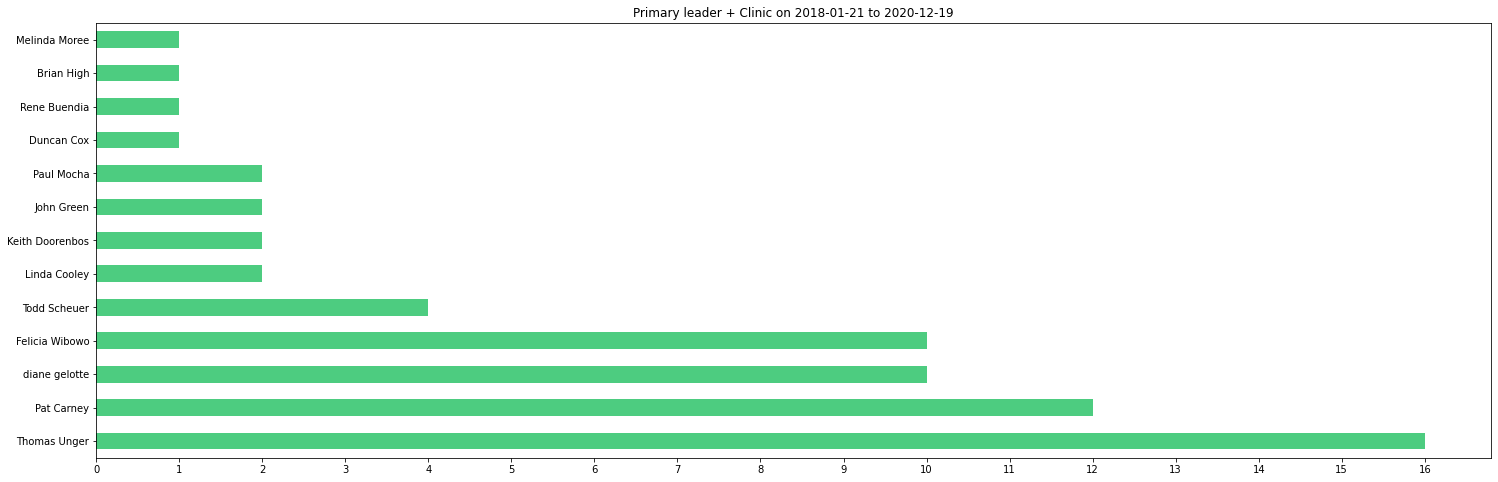

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/Primary leader + Seminar on 2018-01-21 to 2020-12-19.jpg', size 5


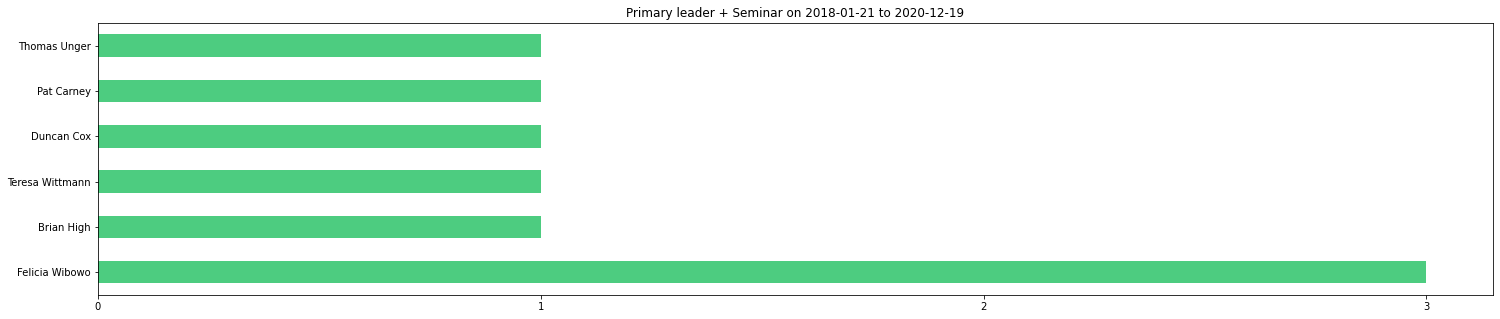

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/Primary leader + Lecture on 2018-01-21 to 2020-12-19.jpg', size 3


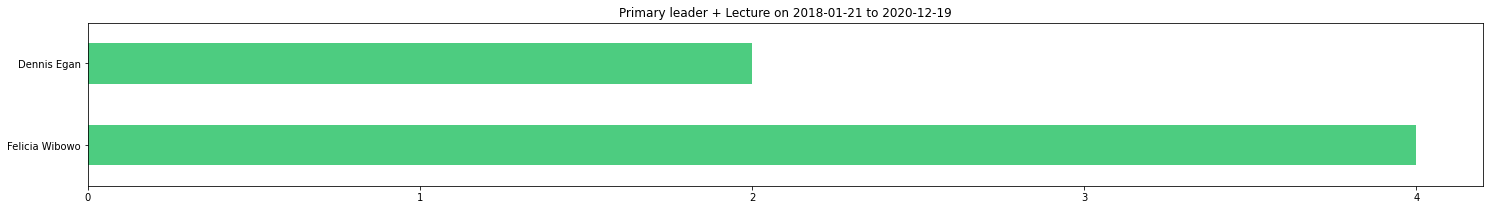

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/Co-leader + All on 2018-01-21 to 2020-12-19.jpg', size 11


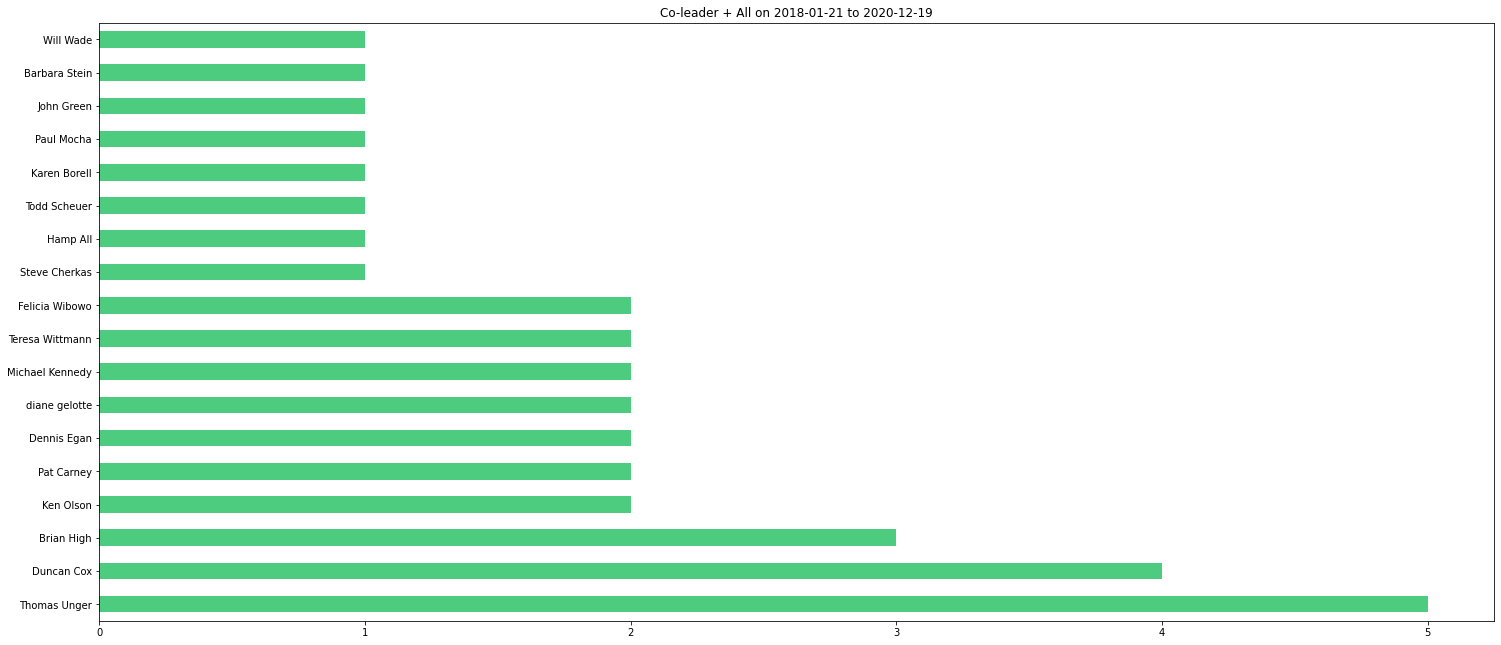

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/Co-leader + Field Trip on 2018-01-21 to 2020-12-19.jpg', size 6


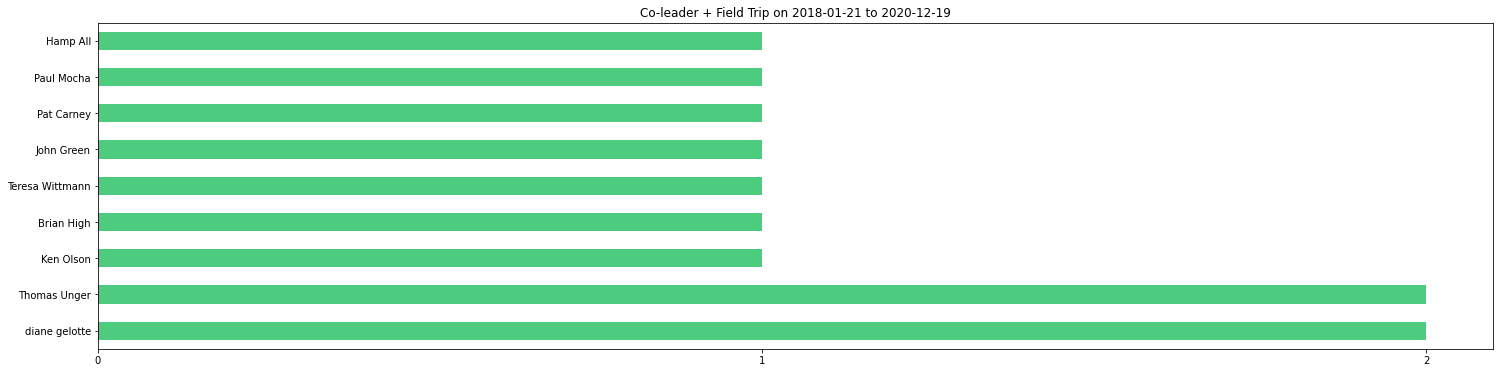

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/Co-leader + Trip on 2018-01-21 to 2020-12-19.jpg', size 6


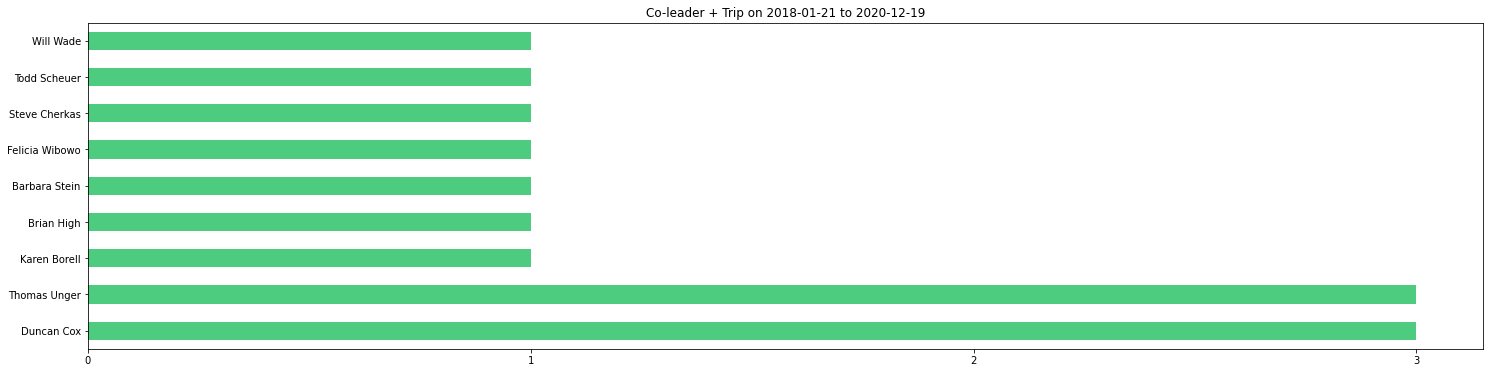

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/Co-leader + Lecture on 2018-01-21 to 2020-12-19.jpg', size 3


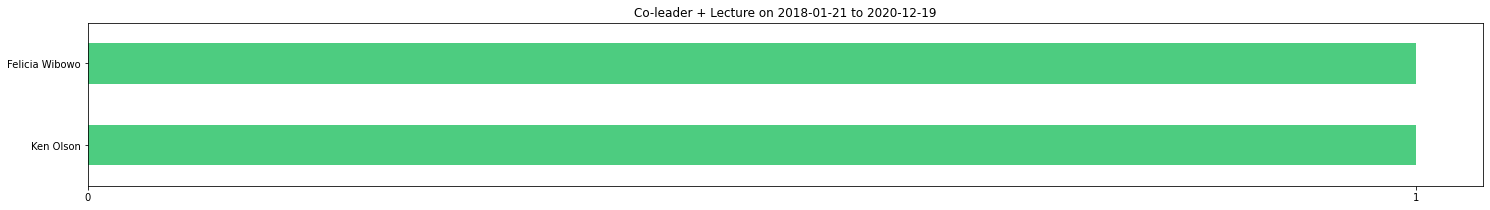

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/Co-leader + Clinic on 2018-01-21 to 2020-12-19.jpg', size 5


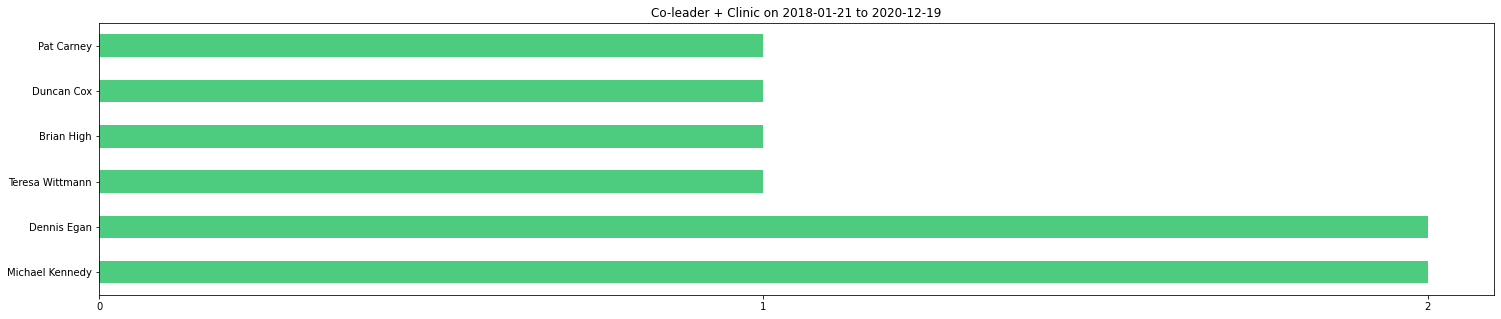

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/Assistant leader + All on 2018-01-21 to 2020-12-19.jpg', size 22


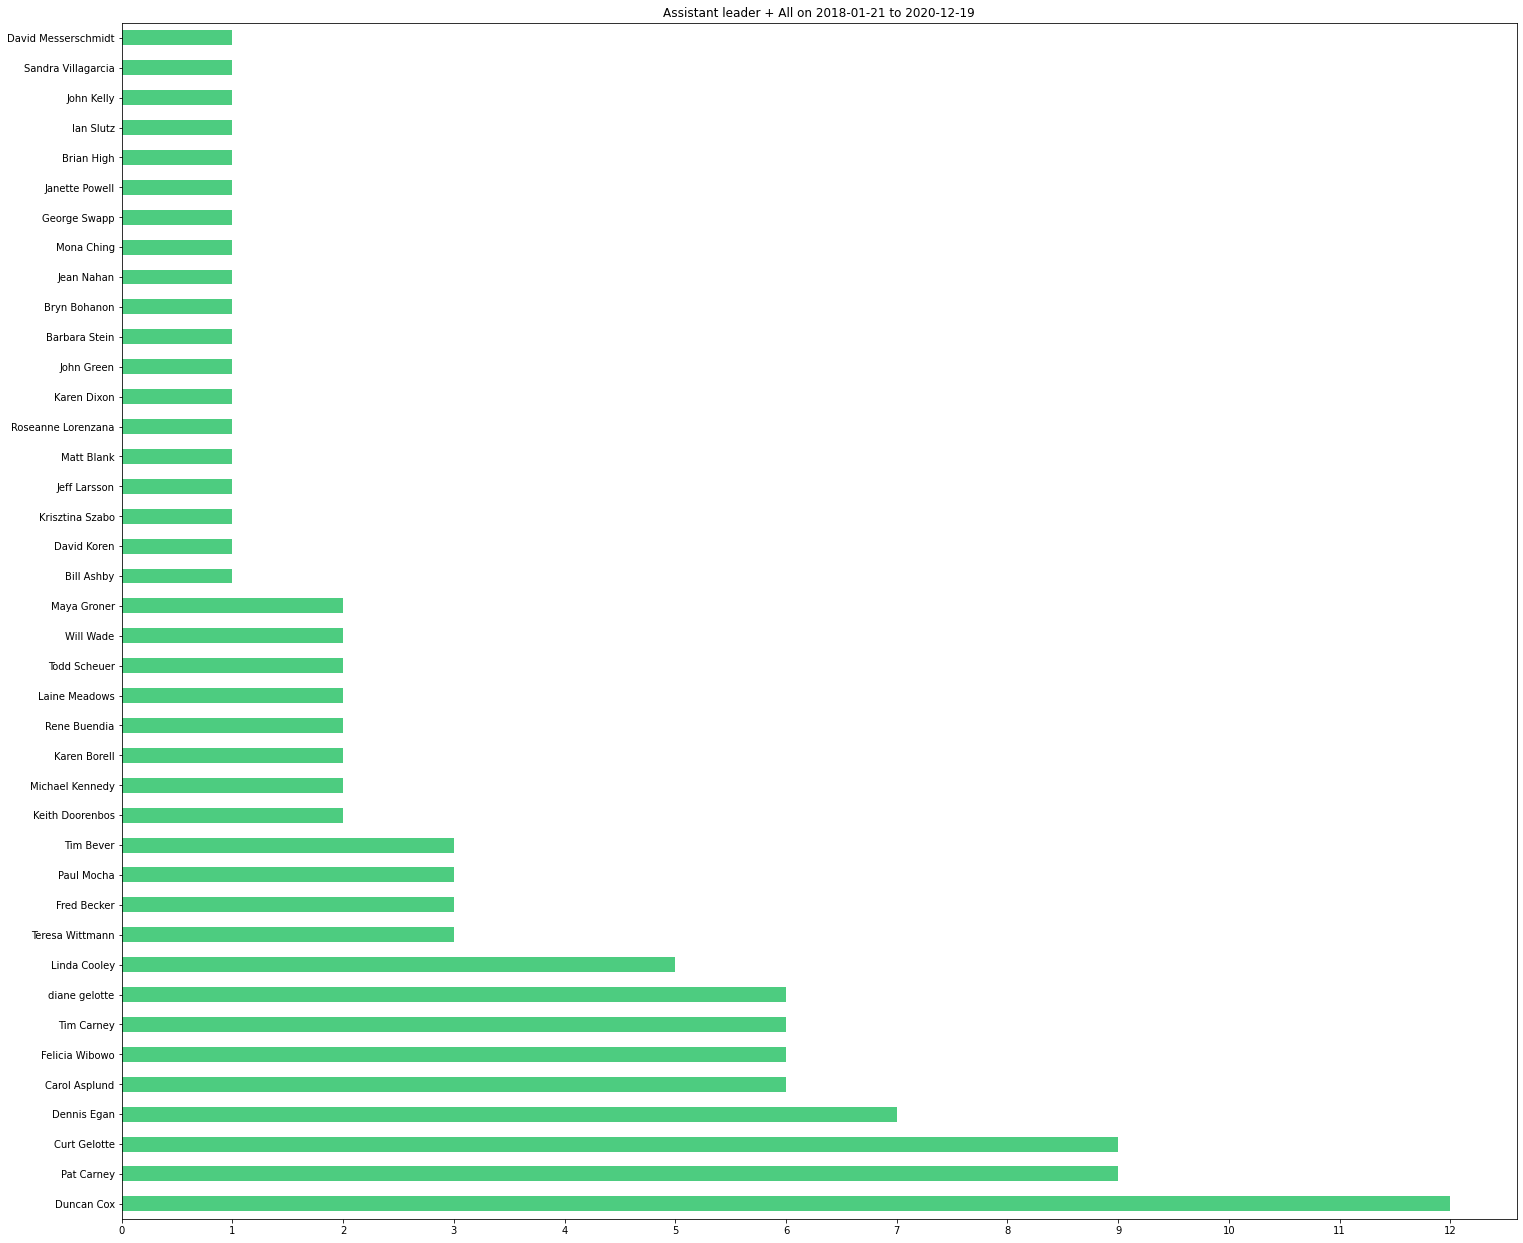

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/Assistant leader + Trip on 2018-01-21 to 2020-12-19.jpg', size 11


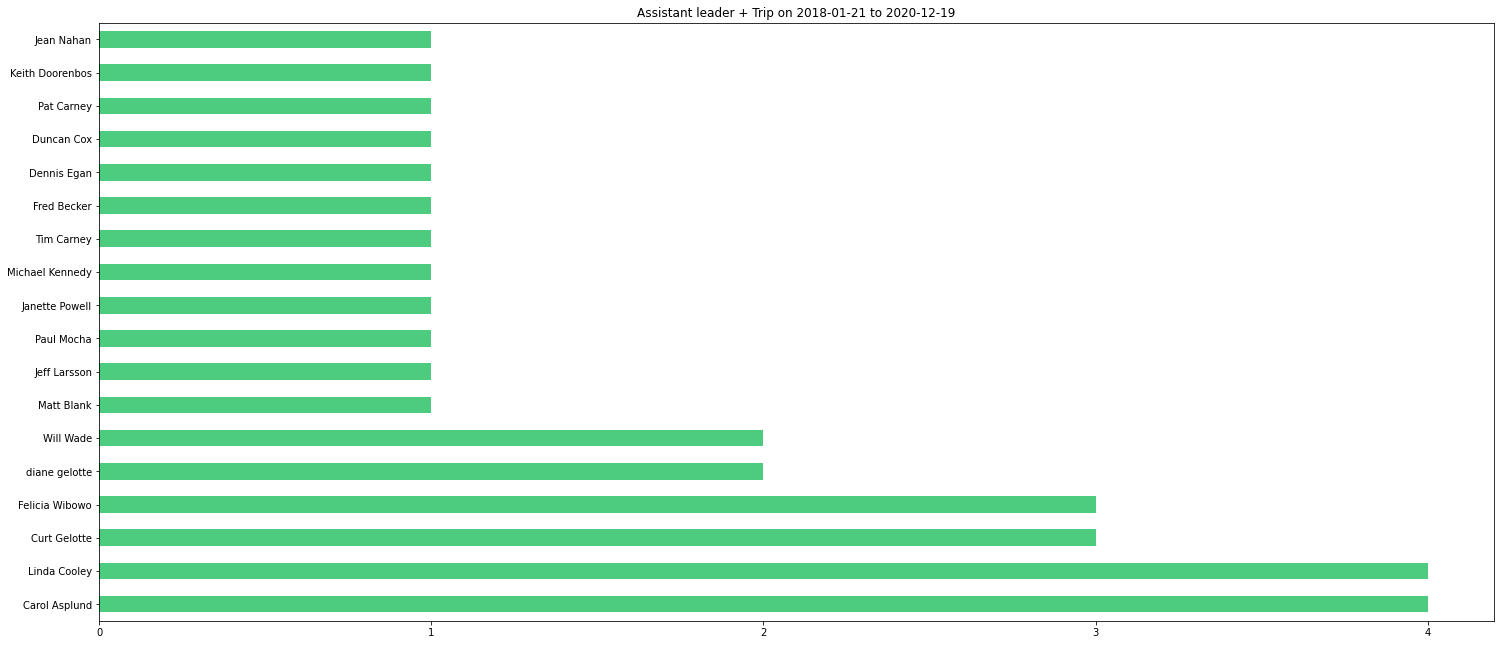

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/Assistant leader + Field Trip on 2018-01-21 to 2020-12-19.jpg', size 16


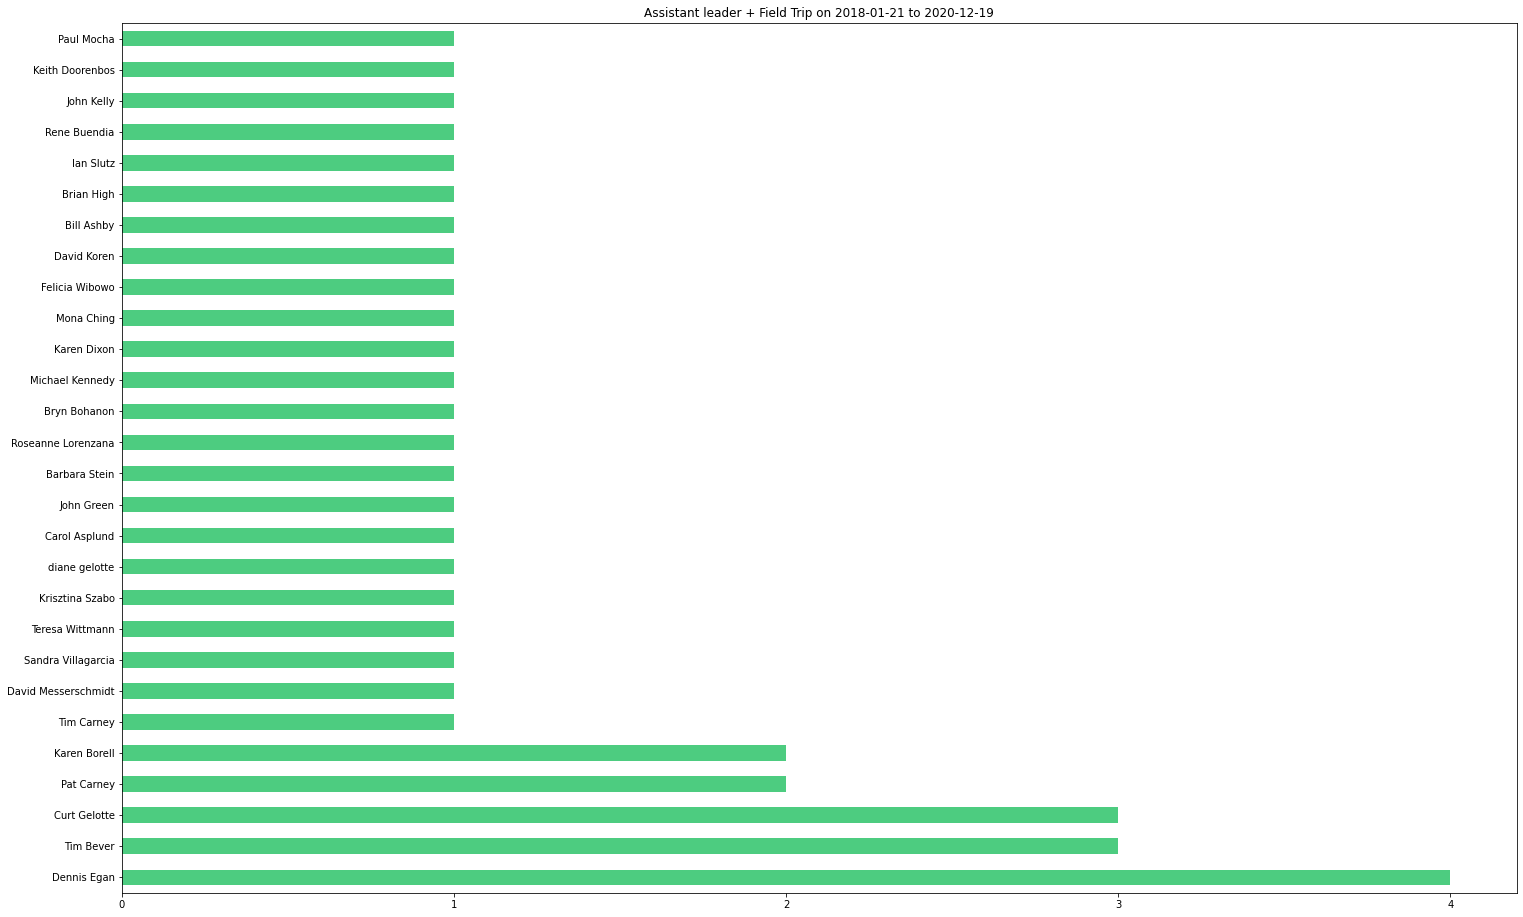

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/Assistant leader + Lecture on 2018-01-21 to 2020-12-19.jpg', size 3


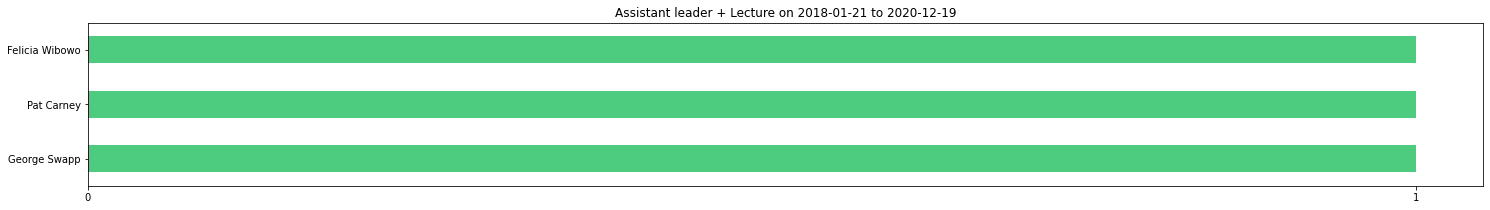

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/Assistant leader + Seminar on 2018-01-21 to 2020-12-19.jpg', size 3


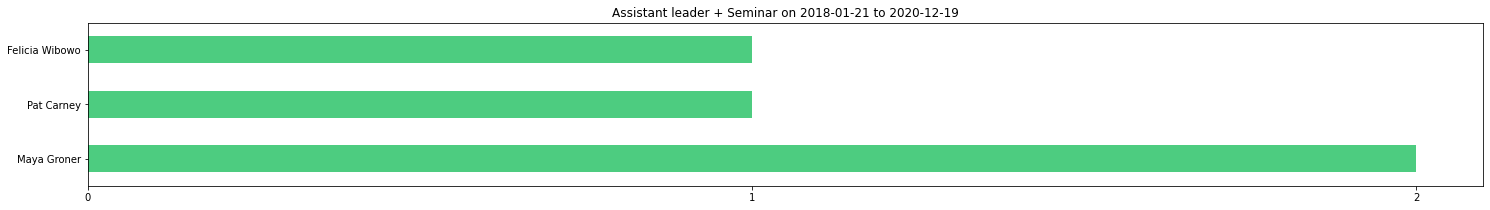

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/Assistant leader + Clinic on 2018-01-21 to 2020-12-19.jpg', size 9


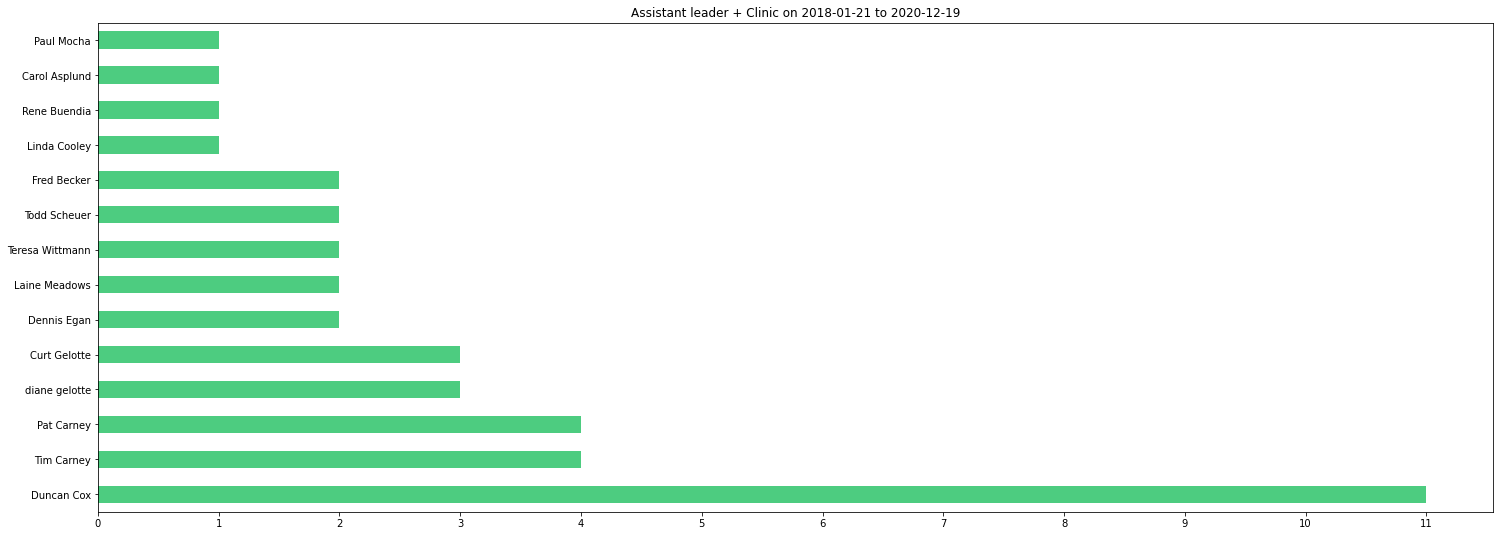

In [5]:
ALL = 'All'

#
# Build list of all leader rolls plus ALL
#
roleList = [ ALL ]
roleList.extend(ds["Activity Role"].unique())

# Iterate on the rolls.
for role in roleList:
    if role != ALL:
        # Select records for that activity role
        rds = ds.loc[ds["Activity Role"] == role]
    else:
        rds = ds

    # Build a list of all activity categories and iterate on that.
    categoryList = [ ALL ]
    categoryList.extend(rds["Activity Category"].unique())
    for category in categoryList:
        if category != ALL:
            # Select records for that category
            cds = rds.loc[rds["Activity Category"] == category]
        else:
            cds = rds

        # Plot a new data from count of times the leader full name appears.
        plotActivity(cds["Full Name"], f"{role} + {category} on {labelDateRange}")
       



Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/Activities.jpg', size 58


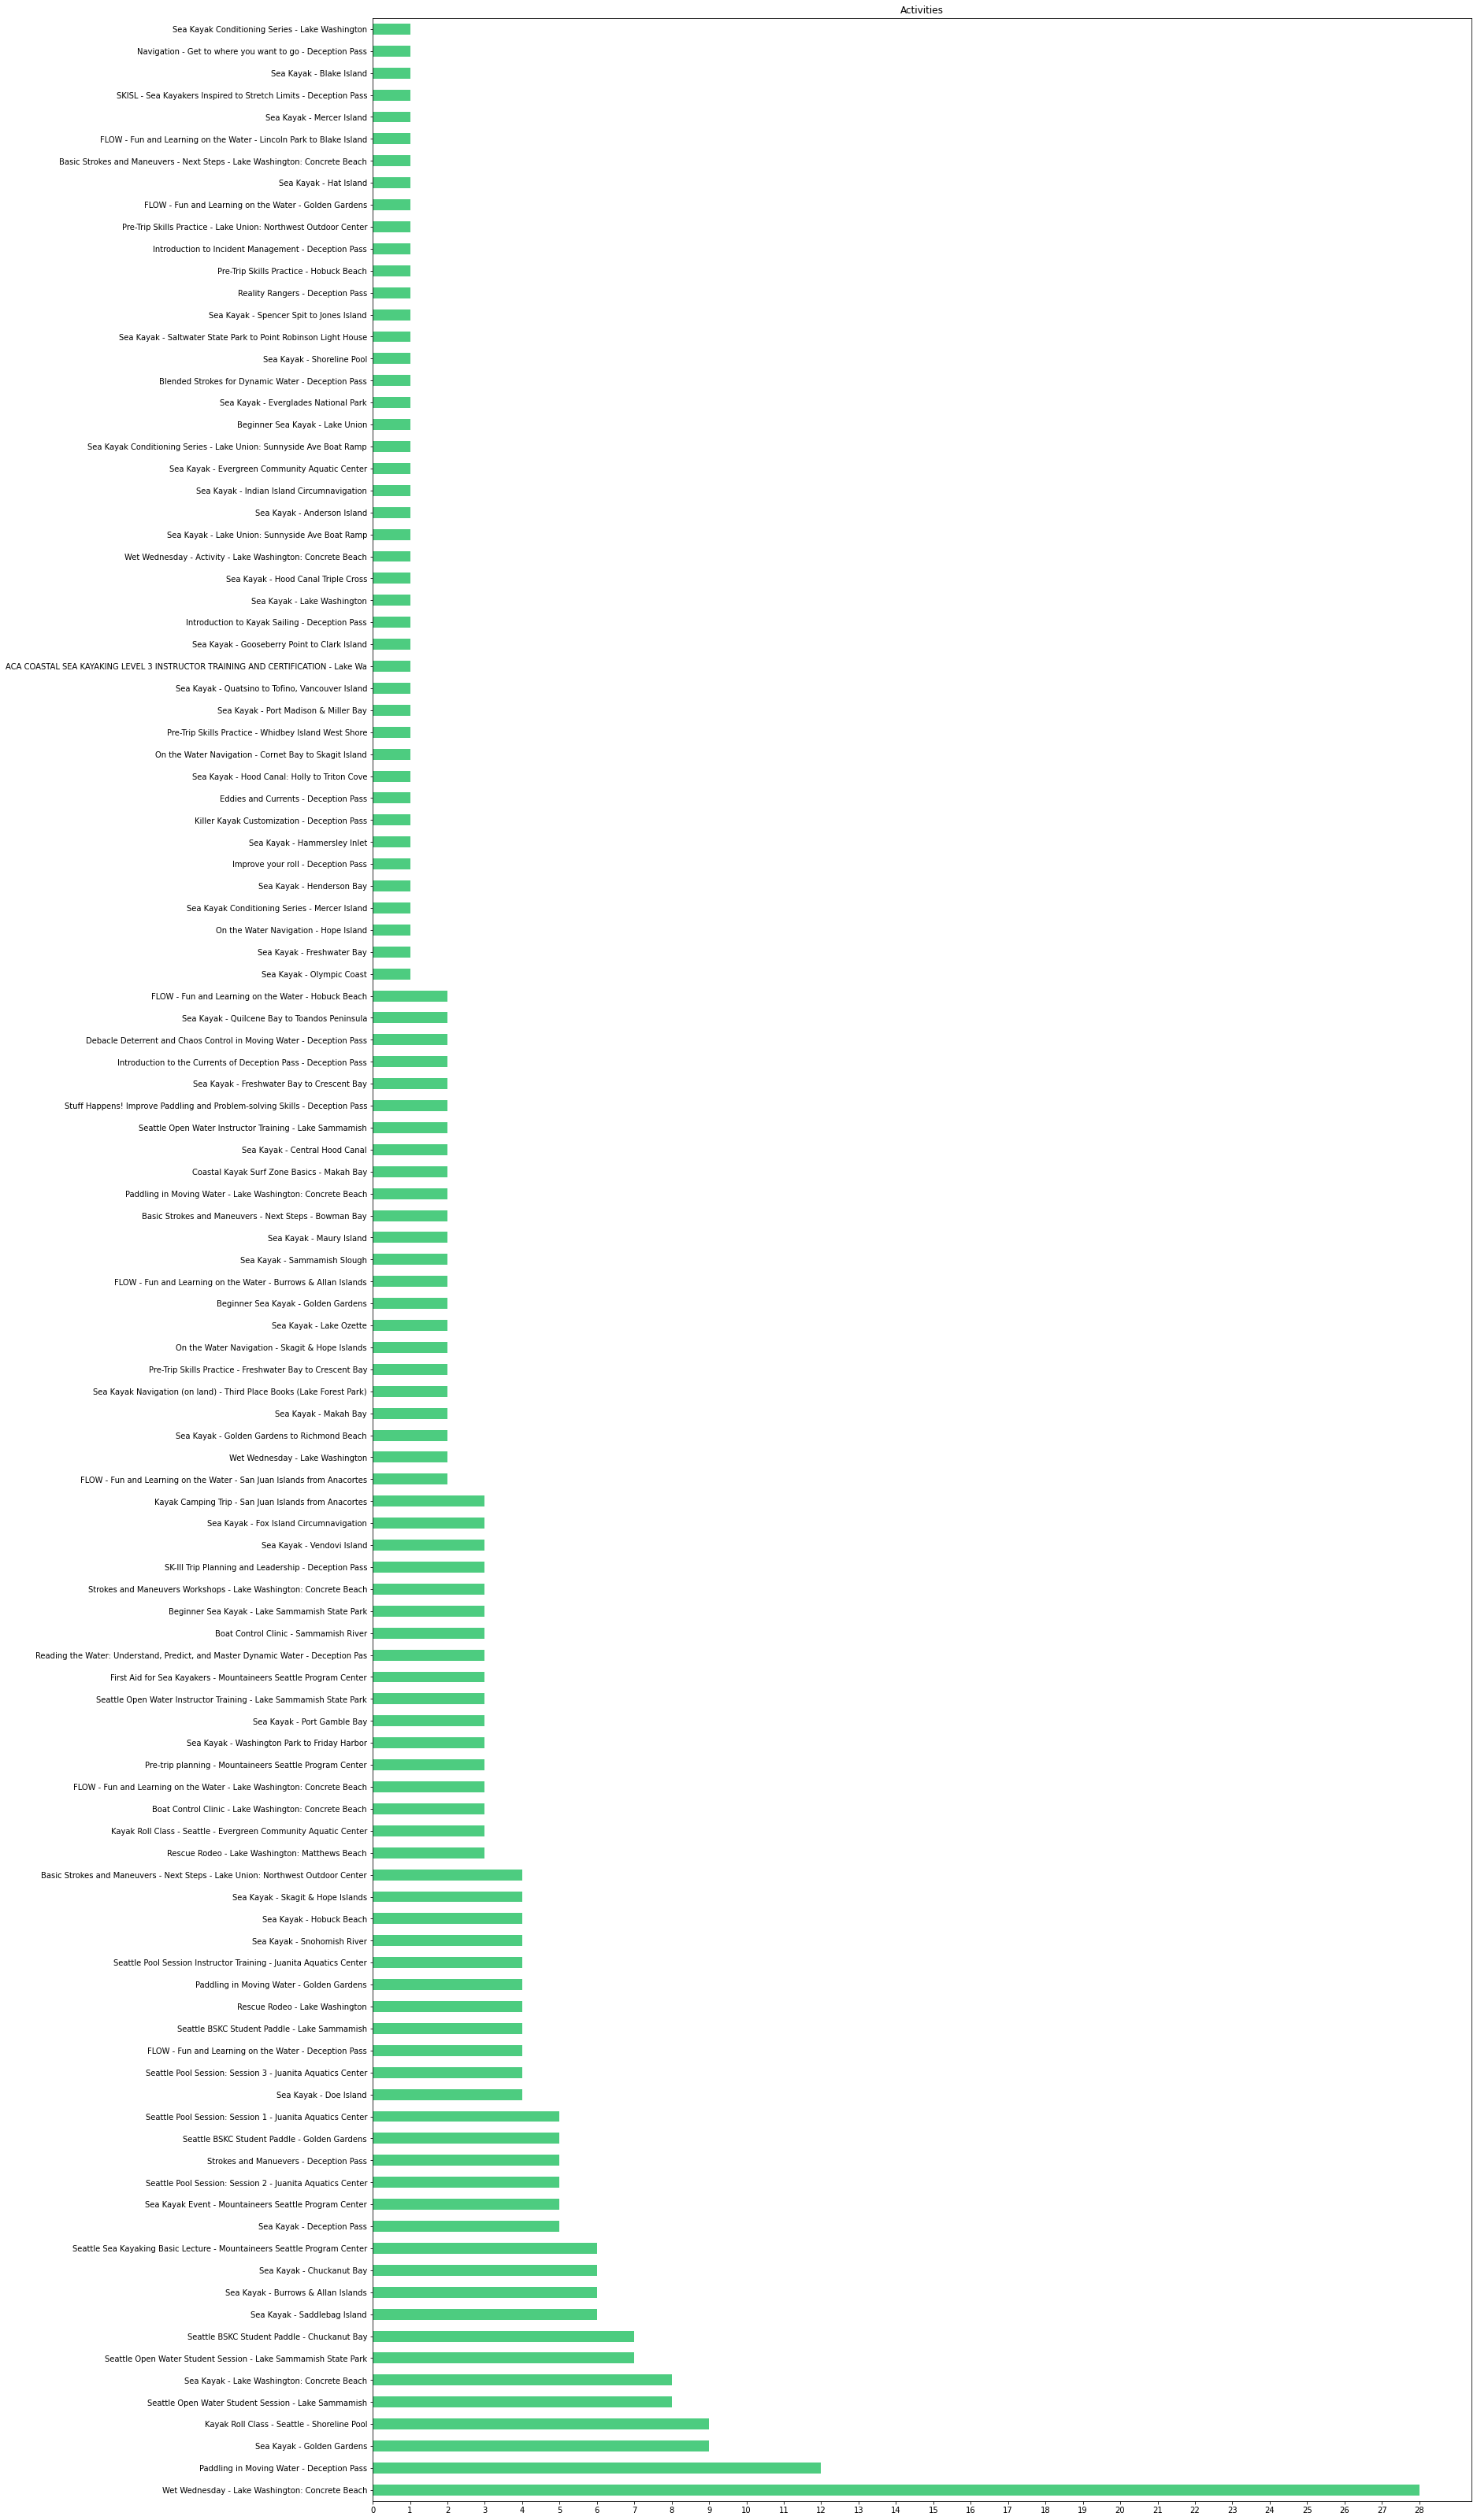

In [6]:
plotActivity(ds["Activity Name"], "Activities")